<a href="https://colab.research.google.com/github/subashniranjan52/Subashniranjan/blob/main/Goldprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Absolute Error: 3.90
Mean Squared Error: 23.61
Predicted Next Day Gold Price: 1596.64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


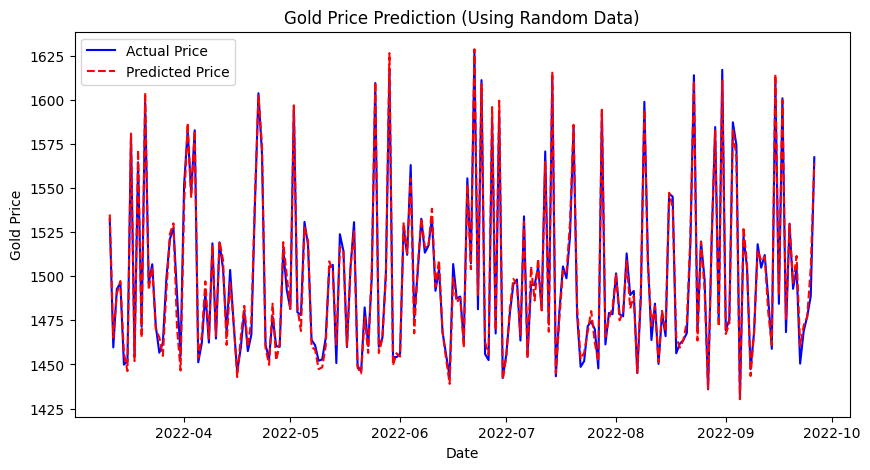

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime, timedelta

# Generate random date and price data
np.random.seed(42)
num_days = 1000  # Number of days of data
start_date = datetime(2020, 1, 1)

# Generate dates
dates = [start_date + timedelta(days=i) for i in range(num_days)]

# Generate random gold prices (starting from 1500 and adding random fluctuations)
prices = 1500 + np.cumsum(np.random.randn(num_days) * 5)  # Random walk for prices

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Price': prices})

# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature Engineering: Use past price as a feature
df['Previous_Price'] = df['Price'].shift(1)
df.dropna(inplace=True)  # Remove first row with NaN

# Define input (X) and output (y)
X = df[['Previous_Price']]
y = df['Price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Predict next day's price
latest_price = df['Price'].iloc[-1]
future_price = model.predict([[latest_price]])
print(f"Predicted Next Day Gold Price: {future_price[0]:.2f}")

# Plot Actual vs Predicted prices
plt.figure(figsize=(10,5))
plt.plot(df.index[-len(y_test):], y_test, label="Actual Price", color='blue')
plt.plot(df.index[-len(y_test):], y_pred, label="Predicted Price", color='red', linestyle='dashed')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Prediction (Using Random Data)")
plt.show()